분포를 대칭화, 산포를 비슷하게, 변수들간의 관계를 단순화

* 분포를 대칭화하면 대표값의 의미가 있음
* 산포를 비슷하게 하면 여러 집단의 비교가 쉬워짐
* 변수들관의 관계를 단순화(직선화)하면 결과의 해석이 편리함

|변환|대칭인 분포의 변화|사용처|
|-|-|-|
|선형|변화 없음||
|제곱|오른쪽으로 기울어짐|왼쪽으로 기울어졌을 때|
|네제곱|심하게 오른쪽으로 기울어짐|심하게 왼쪽으로 기울어졌을 때|
|제곱근|왼쪽으로 기울어짐|오른쪽으로 기울어졌을 때|
|네제곱근|심하게 왼쪽으로 기울어짐|심하게 오른쪽으로 기울어졌을 때|
|지수|극심하게 오른쪽으로 기울어짐|극심하게 왼쪽으로 기울어졌을 때|
|대수|극심하게 왼쪽으로 기울어짐|극심하게 오른쪽으로 기울어졌을 때|

$$\sqrt{y} = \hat{\alpha} + \hat{\beta}x$$

> 거리의 제곱근($y$)은 속도($x$)에 비례한다.

### 변수 사이의 관계를 단순화

`-` 변환을 시켰을 때, 모형의 성능이 개선될 수 있다.

> 결정계수로 많은 변환들을 비교
>
> 한 변수만 변환할 수도 있고, 두 변수 모두 변환할 수도 있음
>
> 허나 해석상에 어려움이 있음.

### 그룹간 산포를 비슷하게 만듦

분산 안정화 변환 Variance Stavilization

> 포아송 분포의 경우 제곱근 변환을 해야 분산이 상수가 된다.(델타 메소드 확장)

ex) 세 종류 보험상품 A, B, C의 청구액 비교

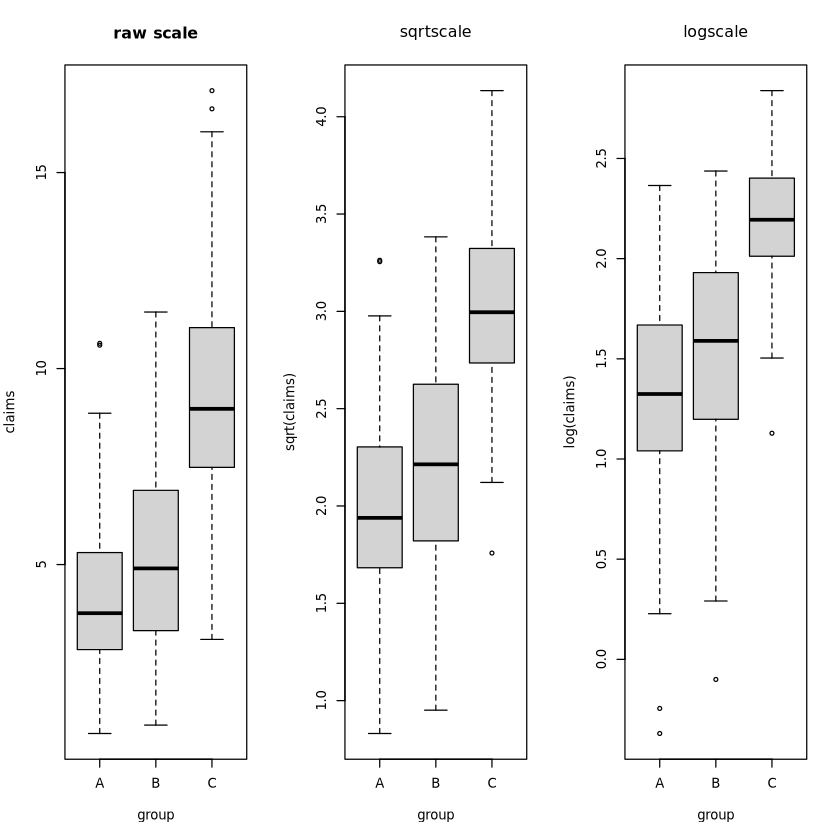

In [9]:
x1<-rgamma(100,4); g1<-rep("A",100)  ## lambda = 1 (default)
x2<-rgamma(100,5); g2<-rep("B",100)
x3<-rgamma(100,9); g3<-rep("C",100)

claims <- c(x1, x2, x3)
group <- factor(c(g1, g2, g3))

par(mfcol = c(1,3))
boxplot(claims~group, main = "raw scale")
boxplot(sqrt(claims)~group, main = expression(paste(sqrt,"scale")))  ## 산포가 가장 비슷해짐
boxplot(log(claims)~group, main = expression(paste(log,"scale")))

`-` Box-Cox transform

$y = x^p,~p>0$

$~~~~~~~log(x), ~p=0$

$~~~~~-x^p,~p<0$

ex) 28종 동물의 (몸무게, 뇌무게)

In [12]:
library(MASS)
data(Animals)
attach(Animals)

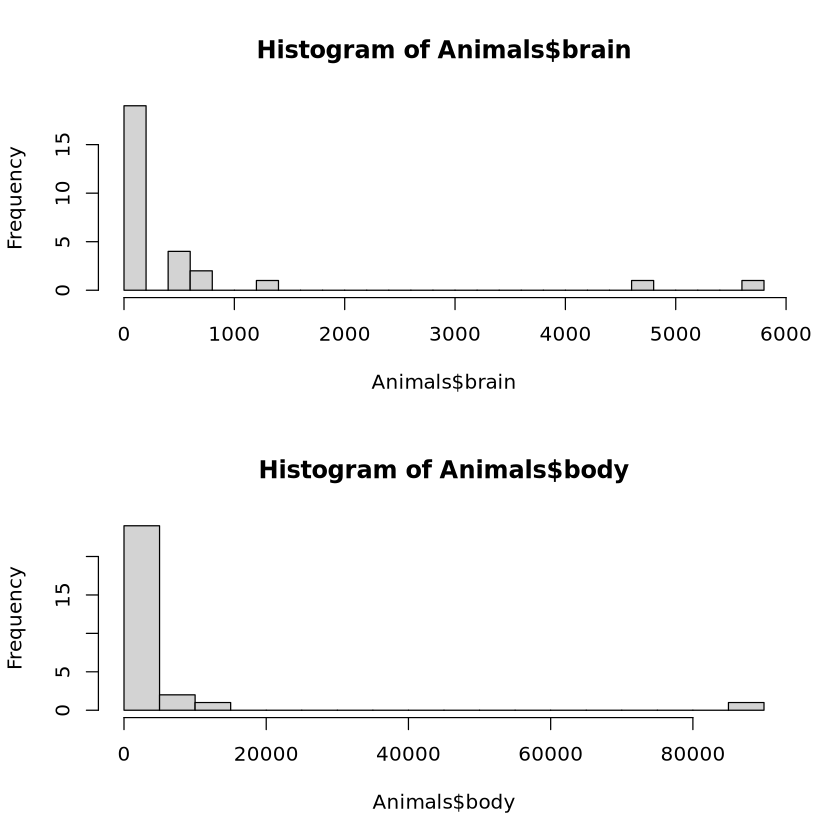

In [46]:
par(mfcol = c(2,1))
hist(Animals$brain, breaks = 25)
hist(Animals$body, breaks = 25)

> 두 수치가 모두 오른쪽으로 심하게 기울어진 분포를 띄고 있기 때문에 대수 변환을 사용하여 재표현한다.

In [33]:
abbreviate(rownames(Animals))  ## 줄임말

Mountain beaver              Cow        Grey wolf             Goat 
          "Mntb"            "Cow"           "Gryw"           "Goat" 
      Guinea pig      Dipliodocus   Asian elephant           Donkey 
          "Gnpg"           "Dpld"           "Asne"           "Dnky" 
           Horse     Potar monkey              Cat          Giraffe 
          "Hors"           "Ptrm"            "Cat"           "Grff" 
         Gorilla            Human African elephant      Triceratops 
          "Grll"           "Humn"           "Afre"           "Trcr" 
   Rhesus monkey         Kangaroo   Golden hamster            Mouse 
          "Rhsm"           "Kngr"           "Gldh"           "Mous" 
          Rabbit            Sheep           Jaguar       Chimpanzee 
          "Rbbt"           "Shep"           "Jagr"           "Chmp" 
             Rat    Brachiosaurus             Mole              Pig 
           "Rat"           "Brch"           "Mole"            "Pig"

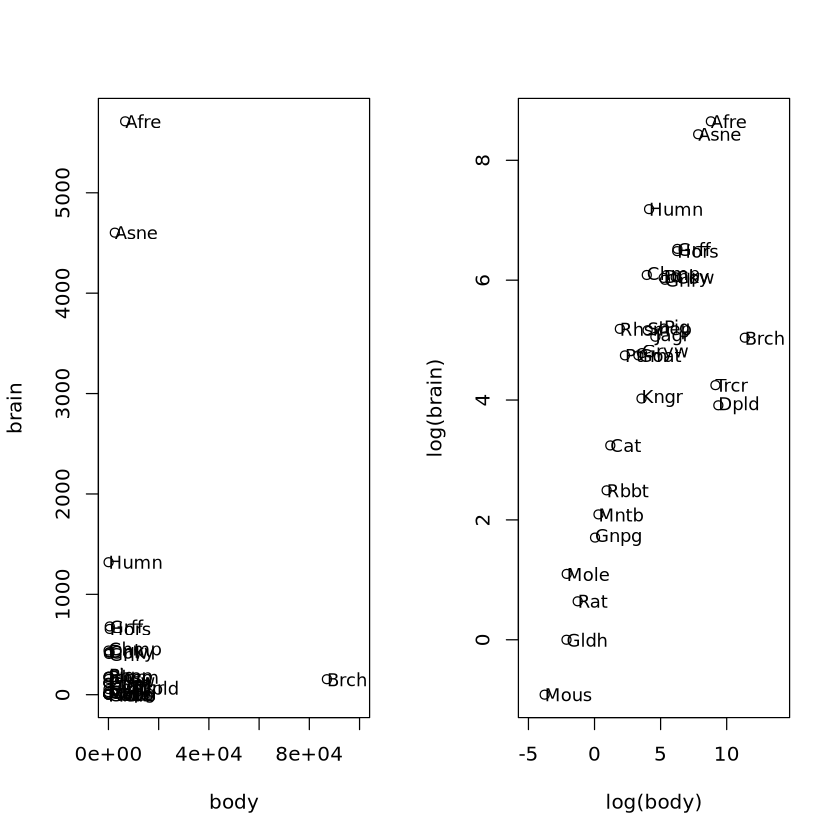

In [60]:
par(mfrow = c(1,2))
plot(brain~body, xlim = c(0, 100000))
text(y = brain, x = body, label = abbreviate(rownames(Animals)), adj = 0, cex = 0.9)

plot(log(brain)~log(body), xlim = c(-5, 14))
text(log(brain)~log(body), label = abbreviate(rownames(Animals)), adj = 0, cex = 0.9)

> 이상치에 영향을 받지 않는 직선의 방정식을 찾고 싶어요.

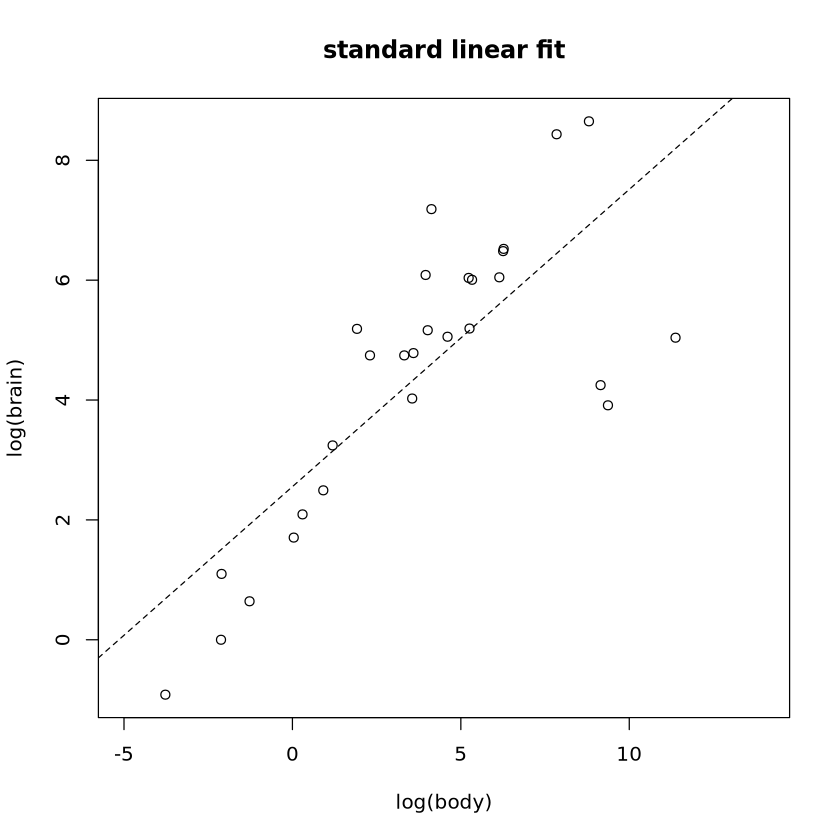

In [62]:
m0 <- lm(log(brain)~log(body))
m1 <- rlm(log(brain)~log(body))  ## resistance linear model, 저항성이 있는 모형

plot(log(brain)~log(body), xlim = c(-5, 14), main = "standard linear fit")
abline(m0, lty = 2)

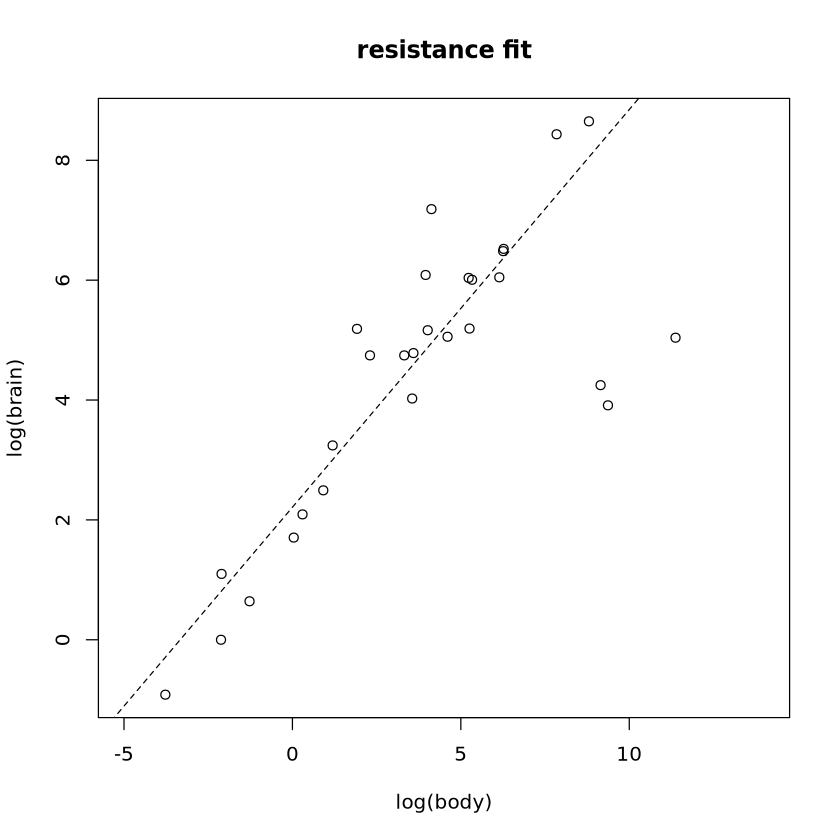

In [63]:
plot(log(brain)~log(body), xlim = c(-5, 14), main = "resistance fit")
abline(m1, lty = 2)

> 저항성이 더 큰 모델이 이상치를 제외하면 설명을 더 잘하는 것 같다.

In [67]:
r = m1$residual

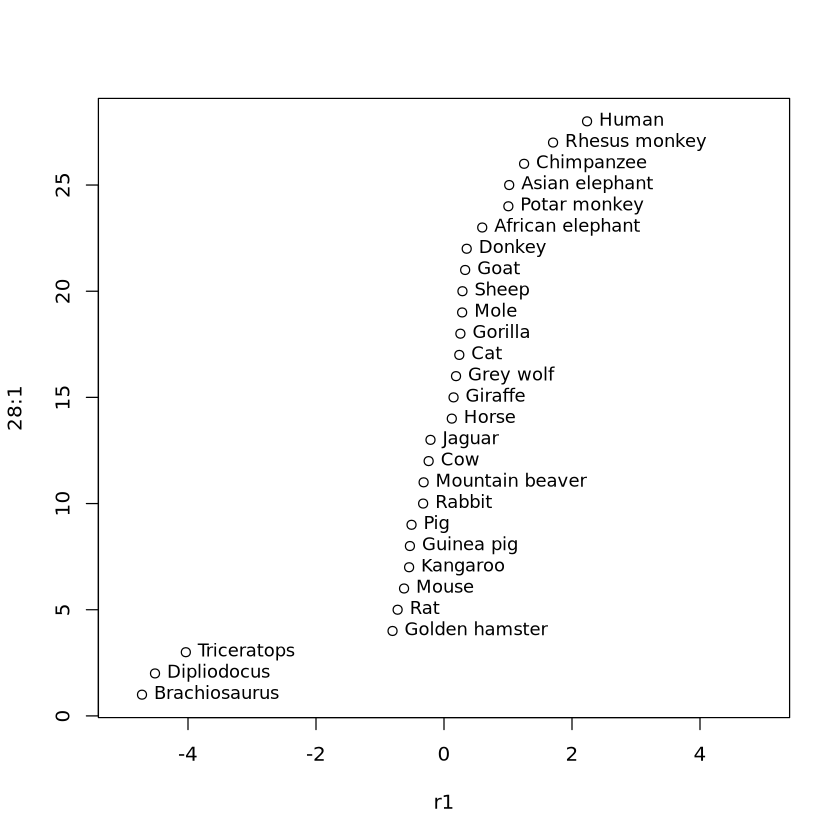

In [68]:
names <-rownames(Animals)
names1<-names[order(r,decreasing=TRUE)]   # 이름 순
r1<-r[order(r,decreasing=T)]     #잔차 순 
df <- data.frame(names1, round(r1,2))
plot(28:1 ~ r1, xlim=c(-5,5))
text(y=28:1, x=r1, label=names1, pos=4, adj=0.2, cex=0.9)

> 잔차가 큰 값일 수록 예측된 값보다 뇌크기가 더 큼

$$r = log(brain) - 2.211 - 0.664×log(body) \to r = log\frac{brain}{body^{0.664}} - 2.211 \to e^r = \frac{brain}{body^{0.664}} + c$$

$$\frac{brain}{body^{0.664}} = \frac{중앙~신경망~용량}{신경망~외부~표면적~넓이}$$

> r을 뇌 진화에 대한 지표로 보았을 때, brain이 커질수록 r이 커지고, body가 커질수록 r이 작아진다.

$$r = log(brain) - 0.664×log(body) + c$$

> 잔차는 log(뇌의 크기)와 비례하고, log(몸무게)와 반비례한다. 이를 로그 차분으로 바꾸어 해석하면,

$$\Delta log(brain) \approx  \frac{\Delta brain}{brain}$$

> 으로, 로그 뇌용량의 증가는 뇌용량의 증가율로 변환되고, 이는 잔차와 비례한다고 말할 수 있다. 반대로, 몸무게의 증가율은

$$\Delta log(body) \approx  \frac{\Delta brain}{brain}, ~~ - 0.664 \Delta log(body) = 0.664 log\frac{1}{\Delta log(body)}$$

> 으로, 잔차와 반비례한다고 말할 수 있다.